In [77]:
# importing the necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

import warnings
warnings.filterwarnings("ignore")

In [78]:
# get the training data and save it in a dataframe.
df= pd.read_csv("train_housing.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [79]:
df.shape

(1168, 81)

In [80]:
# get the test data and save it in a dataframe.
df_test= pd.read_csv("test_housing.csv")
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [81]:
df_test.shape

(292, 80)

In [82]:
# get the basic information about the columns and their data-type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [83]:
# check the unique values of 'Id' column.
len(df['Id'].unique())

# All values are unique.

1168

In [84]:
# drop the 'Id' column as it is nominal data to identify a house.
df.drop(columns=['Id'],inplace=True)

In [85]:
# Check for duplicate values.
df.duplicated().value_counts()

# Not found any.

False    1168
dtype: int64

In [86]:
# Check the unique values
df['Alley'].unique()

# there are some null values.

array([nan, 'Grvl', 'Pave'], dtype=object)

In [87]:
# Imputing the null values with string 'No Access'.
df['Alley']= df['Alley'].fillna("No Access")
df['Alley'].value_counts()

No Access    1091
Grvl           41
Pave           36
Name: Alley, dtype: int64

In [88]:
# Check the unique values.
df['Utilities'].unique()

# Only one value is the entry for whole column.

array(['AllPub'], dtype=object)

In [89]:
# drop the 'Utilities' column.
df.drop(columns=['Utilities'],inplace=True)

In [90]:
# Check the unique values.
df['MasVnrType'].unique()

# there are some null values.

array(['None', 'BrkFace', 'Stone', 'BrkCmn', nan], dtype=object)

In [91]:
# Imputing the null values with string 'None'.
df['MasVnrType']=df['MasVnrType'].fillna("None")
df['MasVnrType'].unique()

array(['None', 'BrkFace', 'Stone', 'BrkCmn'], dtype=object)

In [92]:
# Check the unique values.
df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [93]:
# Imputing the null values with string 'NA'.
df['BsmtQual']=df['BsmtQual'].fillna("NA")
df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', 'NA', 'Fa'], dtype=object)

In [94]:
# Check the unique values.
df['BsmtCond'].unique()

array(['TA', 'Gd', 'Fa', nan, 'Po'], dtype=object)

In [95]:
# Imputing the null values with string 'NA'.
df['BsmtCond']=df['BsmtCond'].fillna("NA")
df['BsmtCond'].unique()

array(['TA', 'Gd', 'Fa', 'NA', 'Po'], dtype=object)

In [96]:
# Check the unique values.
df['BsmtExposure'].unique()

array(['No', 'Gd', 'Av', 'Mn', nan], dtype=object)

In [97]:
# Imputing the null values with string 'NA'.
df['BsmtExposure']=df['BsmtExposure'].fillna("NA")
df['BsmtExposure'].unique()

array(['No', 'Gd', 'Av', 'Mn', 'NA'], dtype=object)

In [98]:
# Check the unique values.
df['BsmtFinType1'].unique()

array(['ALQ', 'GLQ', 'BLQ', 'Unf', 'Rec', 'LwQ', nan], dtype=object)

In [99]:
# Imputing the null values with string 'NA'.
df['BsmtFinType1']=df['BsmtFinType1'].fillna("NA")
df['BsmtFinType1'].unique()

array(['ALQ', 'GLQ', 'BLQ', 'Unf', 'Rec', 'LwQ', 'NA'], dtype=object)

In [100]:
# Check the unique values.
df['BsmtFinType2'].unique()

array(['Unf', 'Rec', 'BLQ', 'GLQ', nan, 'ALQ', 'LwQ'], dtype=object)

In [101]:
# Imputing the null values with string 'NA'.
df['BsmtFinType2']=df['BsmtFinType2'].fillna("NA")
df['BsmtFinType2'].unique()

array(['Unf', 'Rec', 'BLQ', 'GLQ', 'NA', 'ALQ', 'LwQ'], dtype=object)

In [102]:
# Check the unique values.
df['FireplaceQu'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Ex', 'Po'], dtype=object)

In [103]:
# Imputing the null values with string 'NA'.
df['FireplaceQu']=df['FireplaceQu'].fillna("NA")
df['FireplaceQu'].unique()

array(['TA', 'Gd', 'NA', 'Fa', 'Ex', 'Po'], dtype=object)

In [104]:
# Check the unique values.
df['GarageType'].unique()

array(['Attchd', 'BuiltIn', 'Detchd', 'Basment', nan, '2Types', 'CarPort'],
      dtype=object)

In [105]:
# Imputing the null values with string 'NA'.
df['GarageType']=df['GarageType'].fillna("No Garage")
df['GarageType'].unique()

array(['Attchd', 'BuiltIn', 'Detchd', 'Basment', 'No Garage', '2Types',
       'CarPort'], dtype=object)

In [106]:
# Check the unique values.
df['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [107]:
# Imputing the null values with string 'NA'.
df['GarageFinish']=df['GarageFinish'].fillna("NA")
df['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', 'NA'], dtype=object)

In [108]:
# Check the unique values.
df['GarageQual'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Ex', 'Po'], dtype=object)

In [109]:
# Imputing the null values with string 'NA'.
df['GarageQual']=df['GarageQual'].fillna("NA")
df['GarageQual'].unique()

array(['TA', 'Fa', 'NA', 'Gd', 'Ex', 'Po'], dtype=object)

In [110]:
# Check the unique values.
df['GarageCond'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Po', 'Ex'], dtype=object)

In [111]:
# Imputing the null values with string 'NA'.
df['GarageCond']=df['GarageCond'].fillna("NA")
df['GarageCond'].unique()

array(['TA', 'Fa', 'Gd', 'NA', 'Po', 'Ex'], dtype=object)

In [112]:
# Check the unique values.
df['PoolQC'].unique()

array([nan, 'Ex', 'Gd', 'Fa'], dtype=object)

In [113]:
# Imputing the null values with string 'NA'.
df['PoolQC']=df['PoolQC'].fillna("NA")
df['PoolQC'].unique()

array(['NA', 'Ex', 'Gd', 'Fa'], dtype=object)

In [114]:
# Check the unique values.
df['Fence'].unique()

array([nan, 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [115]:
# Imputing the null values with string 'NA'.
df['Fence']=df['Fence'].fillna("NA")
df['Fence'].unique()

array(['NA', 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [116]:
# Check the unique values.
df['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'TenC', 'Othr'], dtype=object)

In [117]:
# Imputing the null values with string 'NA'.
df['MiscFeature']=df['MiscFeature'].fillna("NA")
df['MiscFeature'].unique()

array(['NA', 'Shed', 'Gar2', 'TenC', 'Othr'], dtype=object)

In [118]:
# Segregating of continuous and categorical columns.
cont_features=[]
cat_features=[]
for i in df.columns:
    if df[i].dtype=='O':
        if len(df[i].unique())<=25:
            cat_features.append(i)
        else:
            cont_features.append(i)
    elif df[i].dtype=='int64':
        if len(df[i].unique())<=25:
            cat_features.append(i)
        else:
            cont_features.append(i)
    elif df[i].dtype=='float64':
        if len(df[i].unique())<=25:
            cat_features.append(i)
        else:
            cont_features.append(i)
    else:
        print(i)

In [119]:
df[cont_features]

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,NaN,4928,1976,1976,0.0,120,0,958,1078,958,0,958,1977.0,440,0,205,0,0,128000
1,95.0,15865,1970,1970,0.0,351,823,1043,2217,2217,0,2217,1970.0,621,81,207,0,224,268000
2,92.0,9920,1996,1997,0.0,862,0,255,1117,1127,886,2013,1997.0,455,180,130,0,0,269790
3,105.0,11751,1977,1977,480.0,705,0,1139,1844,1844,0,1844,1977.0,546,0,122,0,0,190000
4,NaN,16635,1977,2000,126.0,1246,0,356,1602,1602,0,1602,1977.0,529,240,0,0,0,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,NaN,9819,1967,1967,31.0,450,0,432,882,900,0,900,1970.0,280,0,0,0,0,122000
1164,67.0,8777,1949,2003,0.0,0,0,0,0,1126,0,1126,2002.0,520,0,96,0,0,108000
1165,24.0,2280,1976,1976,0.0,566,0,289,855,855,601,1456,1976.0,440,87,0,0,0,148500
1166,50.0,8500,1920,1950,0.0,0,0,649,649,649,668,1317,1920.0,250,0,54,172,0,40000


In [120]:
# Removing the 'SalePrice' column from the list of continuous features as it is our target column.
cont_features.pop()
# Removing the columns which signify the year of construction or remodelling.
cont_features.remove('YearBuilt')
cont_features.remove('YearRemodAdd')
cont_features.remove('GarageYrBlt')

In [121]:
df[cat_features]

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,3SsnPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,120,RL,Pave,No Access,IR1,Lvl,Inside,Gtl,NPkVill,Norm,...,0,0,NA,NA,NA,0,2,2007,WD,Normal
1,20,RL,Pave,No Access,IR1,Lvl,Inside,Mod,NAmes,Norm,...,0,0,NA,NA,NA,0,10,2007,WD,Normal
2,60,RL,Pave,No Access,IR1,Lvl,CulDSac,Gtl,NoRidge,Norm,...,0,0,NA,NA,NA,0,6,2007,WD,Normal
3,20,RL,Pave,No Access,IR1,Lvl,Inside,Gtl,NWAmes,Norm,...,0,0,NA,MnPrv,NA,0,1,2010,COD,Normal
4,20,RL,Pave,No Access,IR1,Lvl,FR2,Gtl,NWAmes,Norm,...,0,0,NA,NA,NA,0,6,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,20,RL,Pave,No Access,IR1,Lvl,Inside,Gtl,Sawyer,Norm,...,0,0,NA,MnPrv,NA,0,2,2010,WD,Normal
1164,20,RL,Pave,No Access,Reg,Lvl,Inside,Gtl,Edwards,Feedr,...,0,0,NA,MnPrv,NA,0,5,2009,WD,Normal
1165,160,RL,Pave,No Access,Reg,Lvl,FR2,Gtl,NPkVill,Norm,...,0,0,NA,NA,NA,0,7,2009,WD,Normal
1166,70,C (all),Pave,Pave,Reg,Lvl,Inside,Gtl,IDOTRR,Feedr,...,0,0,NA,MnPrv,NA,0,7,2008,WD,Normal


# Let us see some plots of our dataset

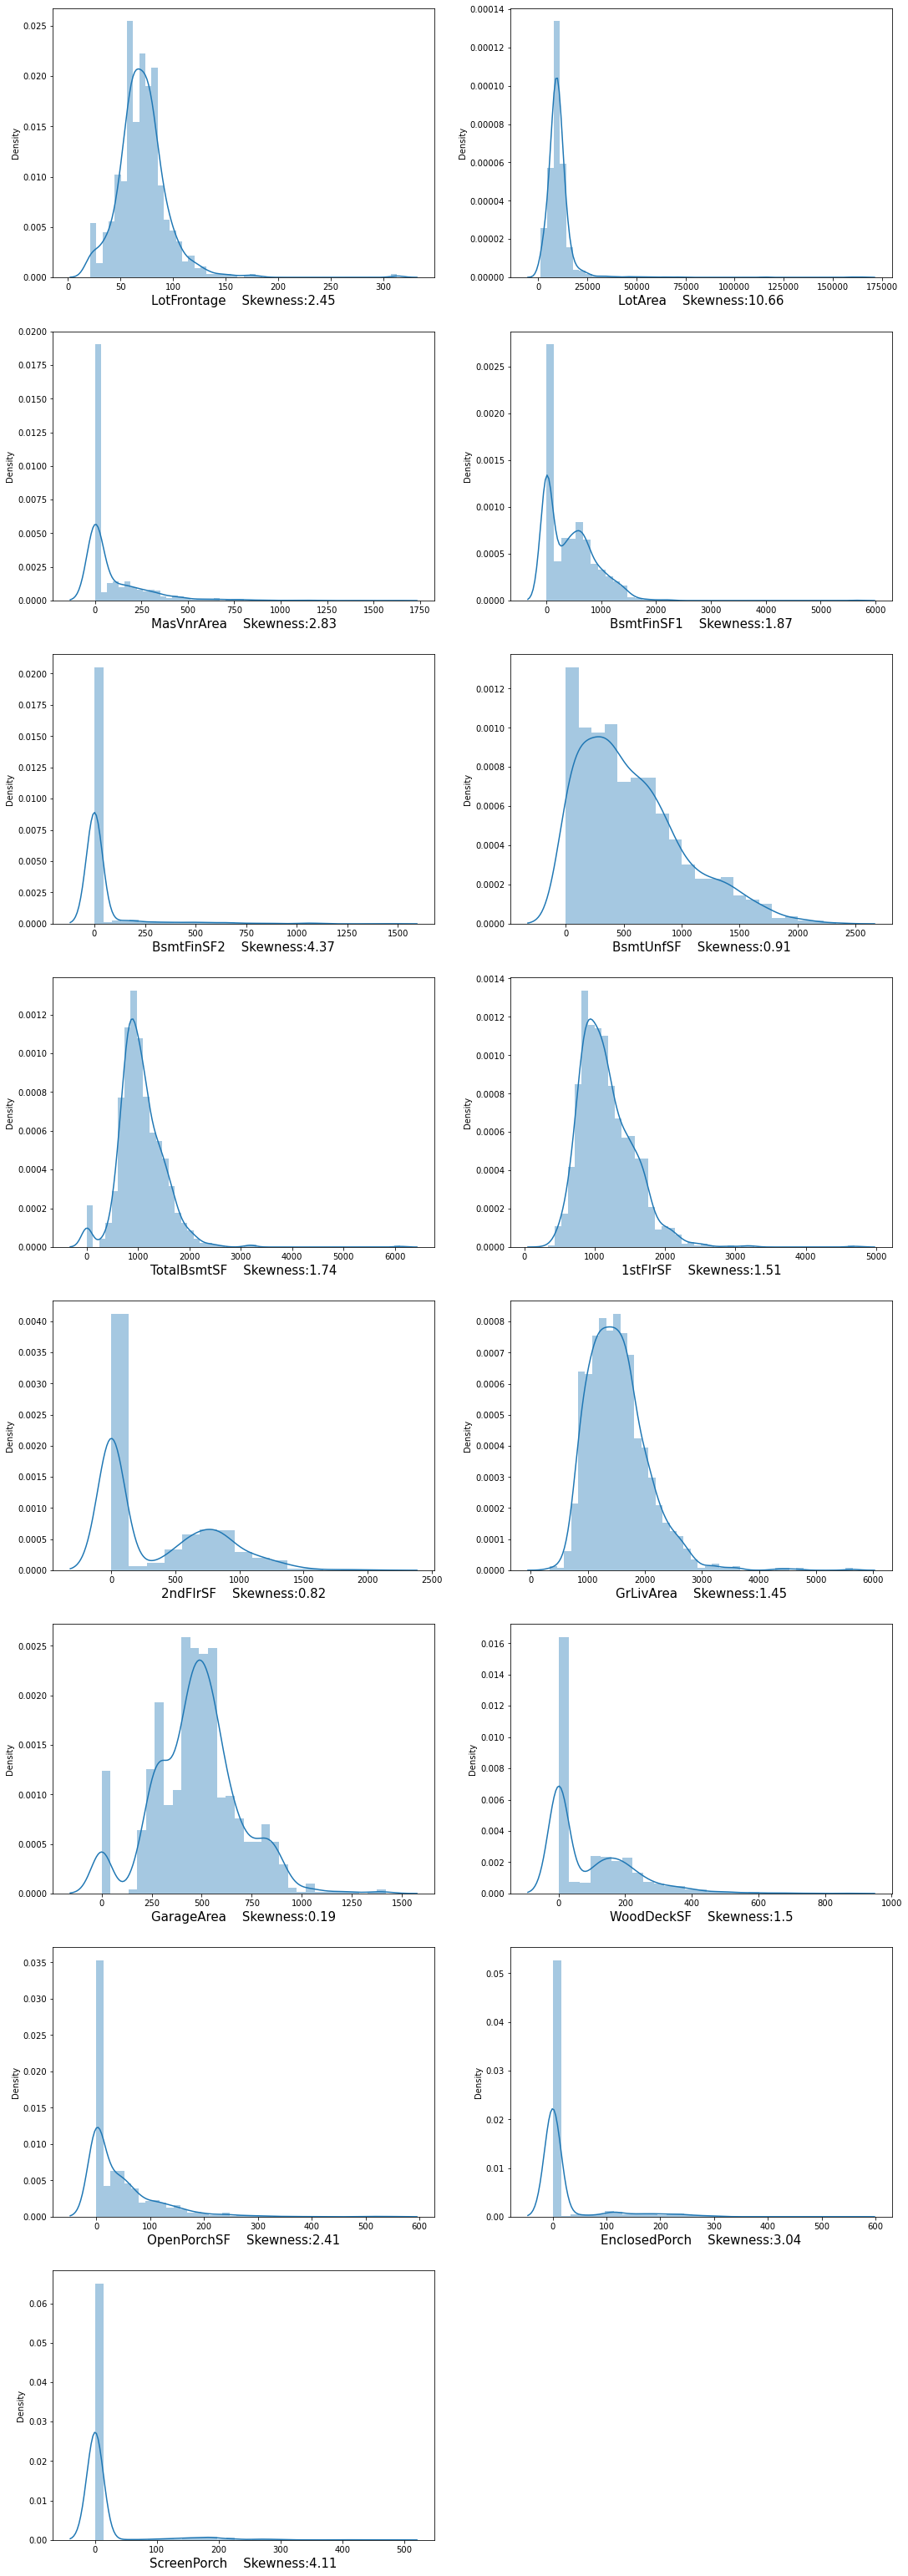

In [122]:
# Distribution plots of the columns with continuous data.
plt.figure(figsize=(18,70))
plotnumber=1
for column in cont_features:
    if plotnumber<=20:
        ax= plt.subplot(10,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column+'    '+'Skewness:'+str(round(df[column].skew(),2)),fontsize=15)
    plotnumber+=1
plt.show()

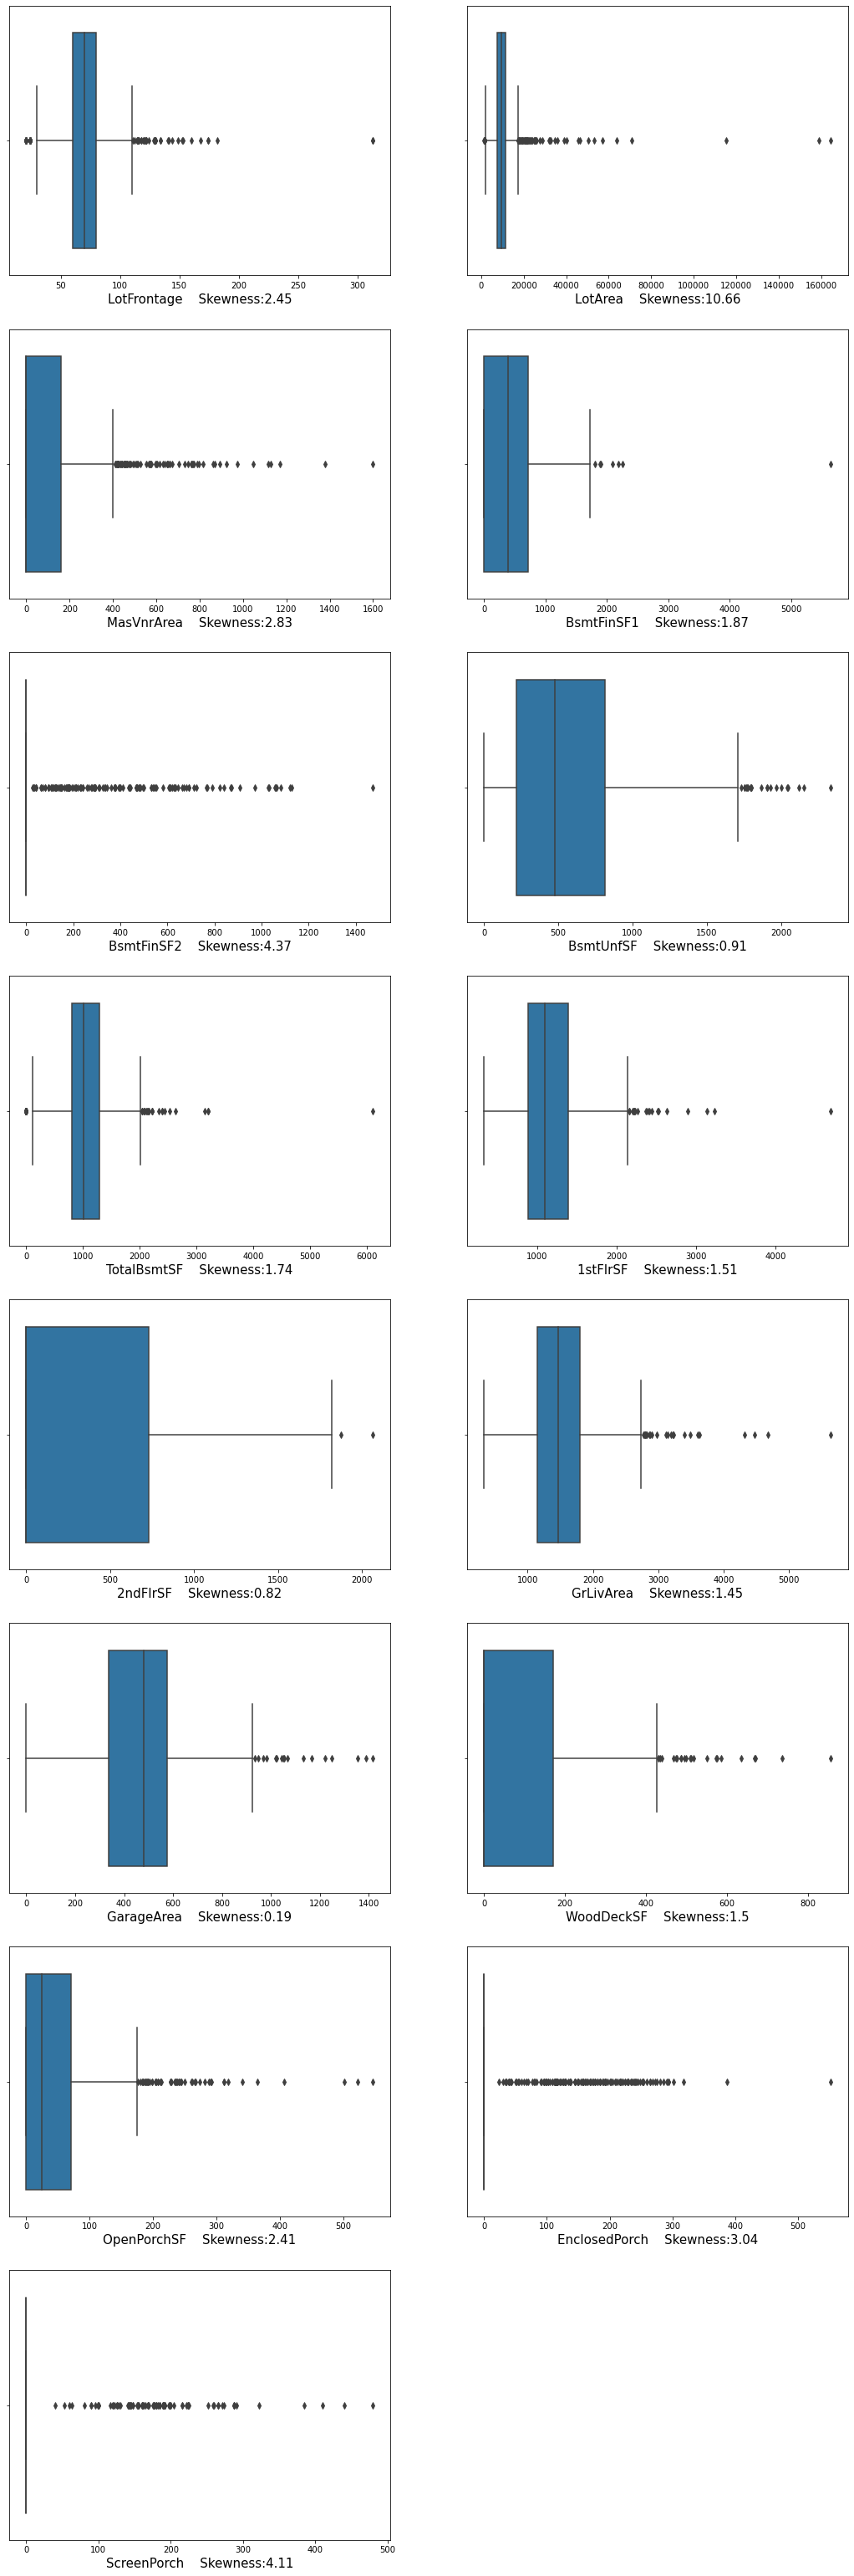

In [123]:
# Now let's see the box-plots of the continuous data features. 
plt.figure(figsize=(18,70))
plotnumber=1
for column in cont_features:
    if plotnumber<=20:
        ax= plt.subplot(10,2,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column+'    '+'Skewness:'+str(round(df[column].skew(),2)),fontsize=15)
    plotnumber+=1
plt.show()

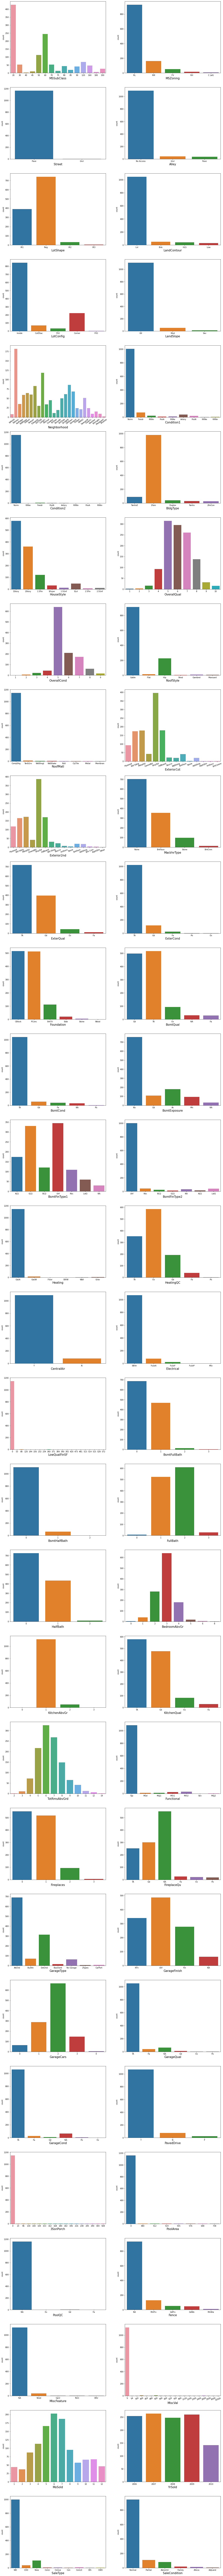

In [124]:
# Count plots of the categorical features.
plt.figure(figsize=(20,250))
plotnumber=1
for column in cat_features:
    if plotnumber<=60:
        ax= plt.subplot(30,2,plotnumber)
        sns.countplot(df[column])
        plt.xlabel(column,fontsize=15)
        if column in ['Exterior1st','Exterior2nd','MiscVal']:
            plt.xticks(rotation=20)
        elif column=='Neighborhood':
            plt.xticks(rotation=35)
    plotnumber+=1
plt.show()

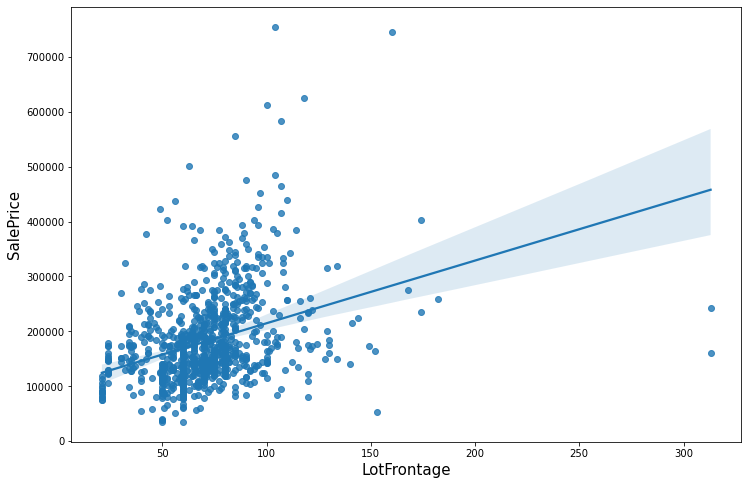

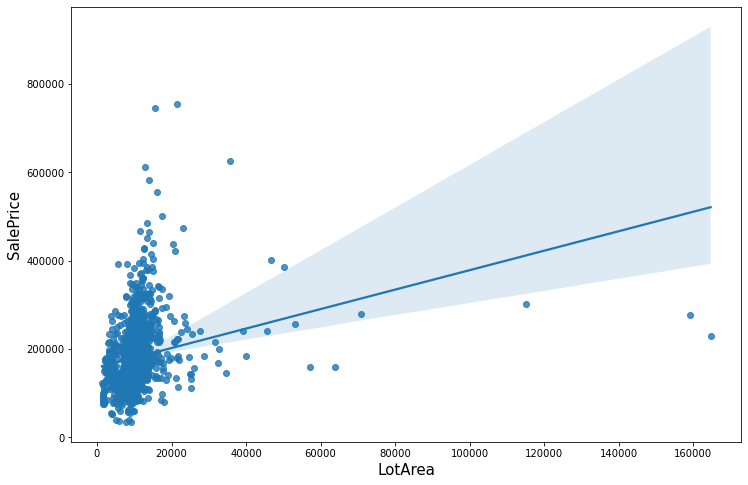

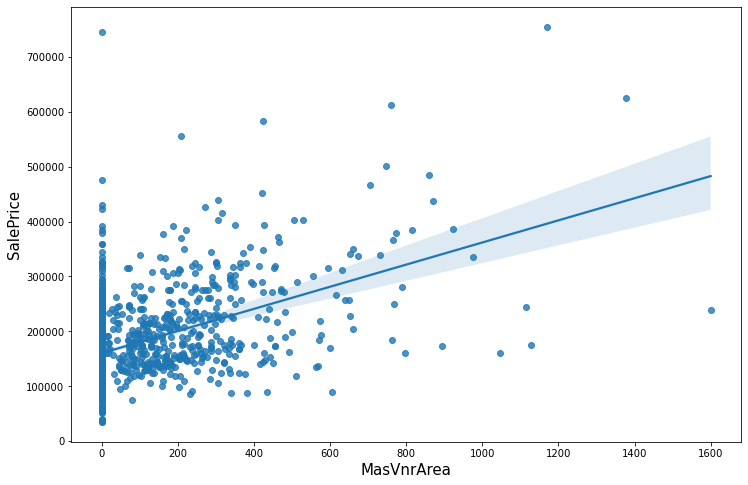

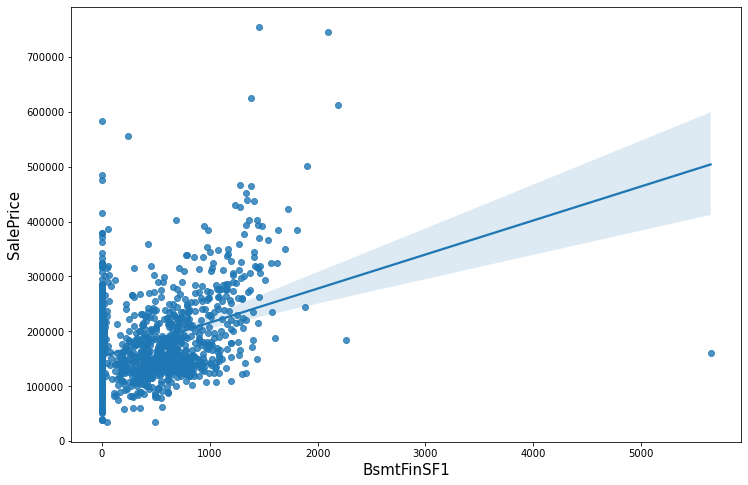

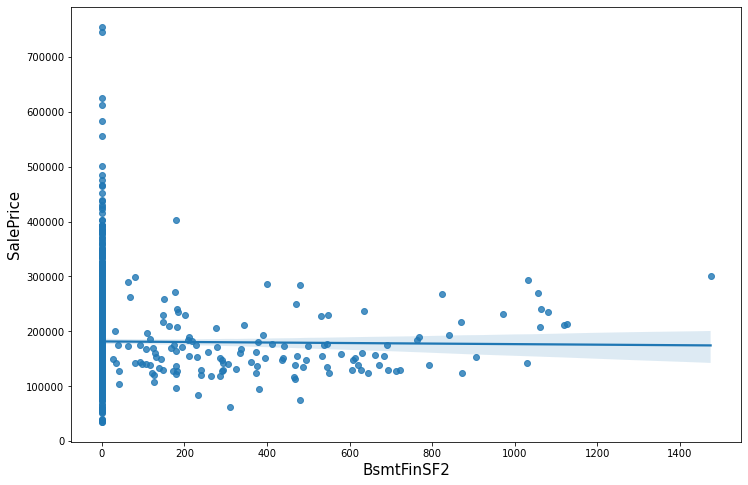

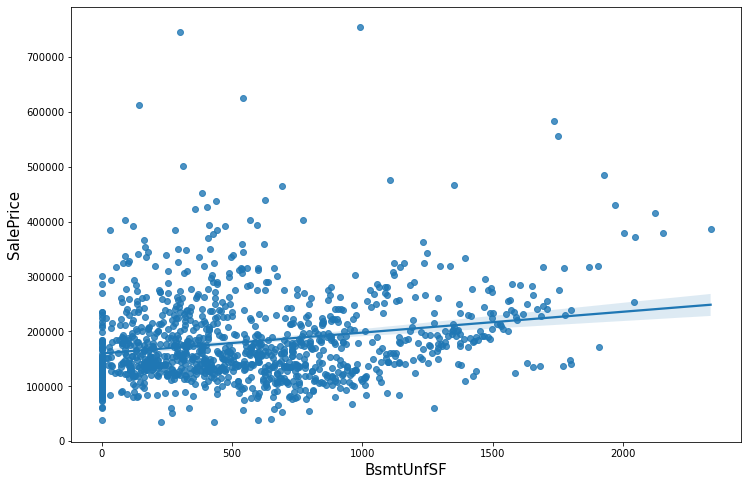

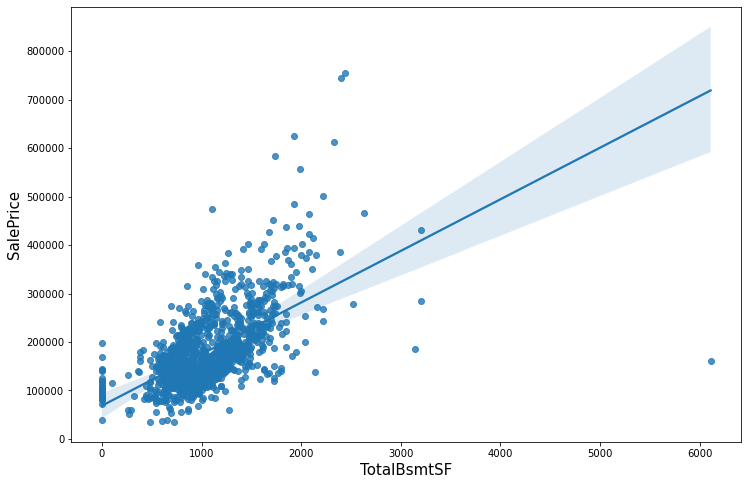

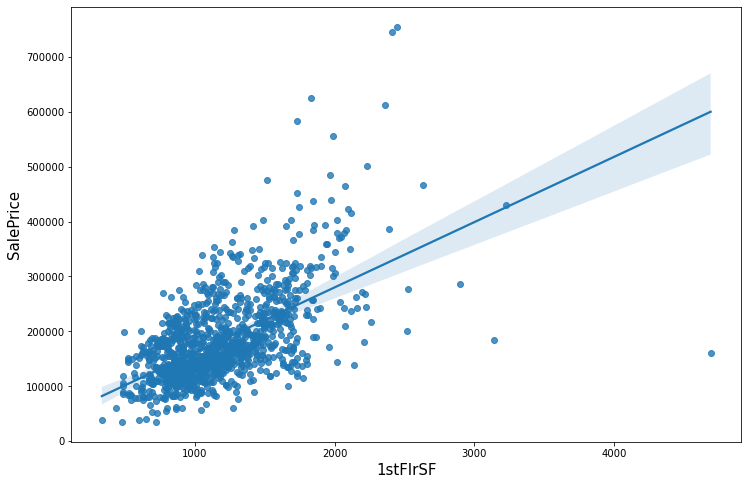

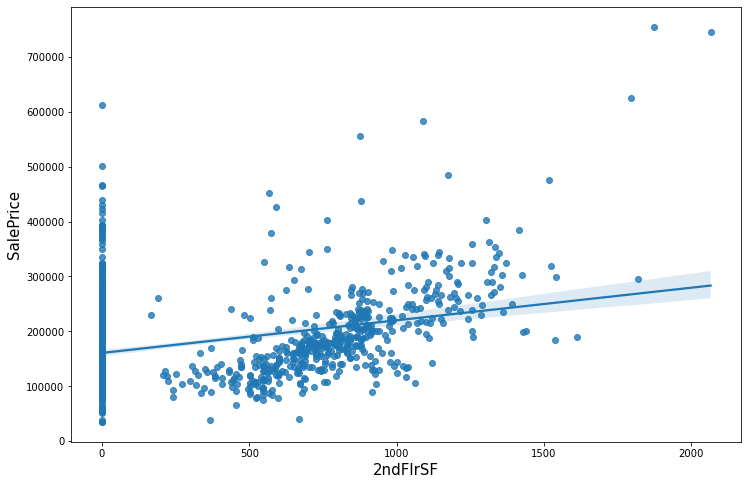

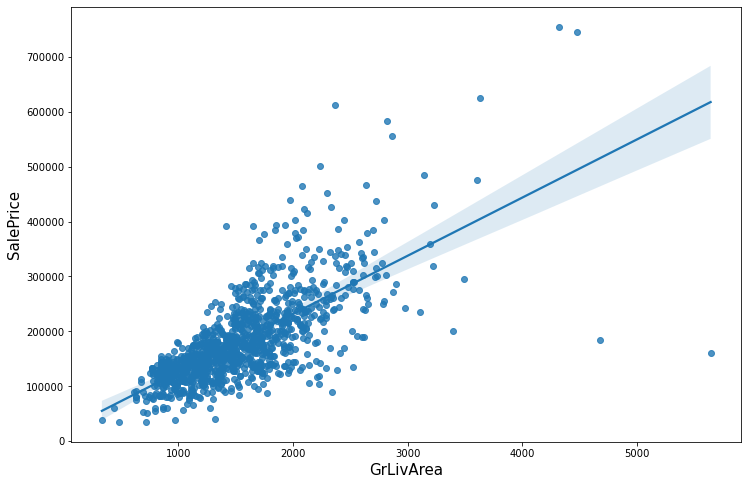

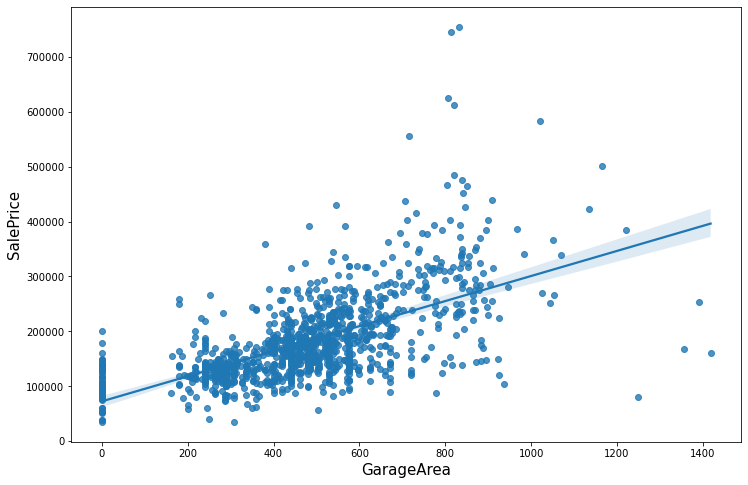

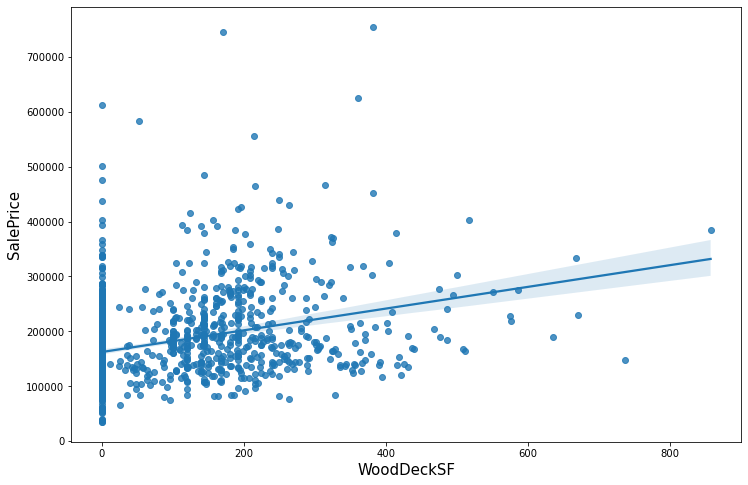

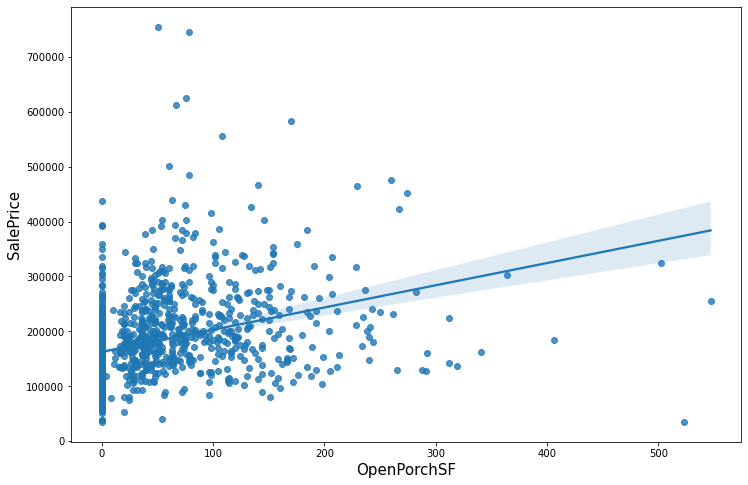

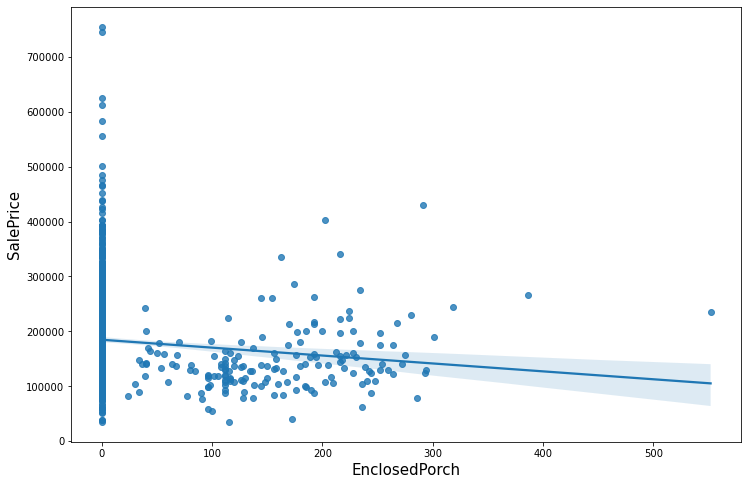

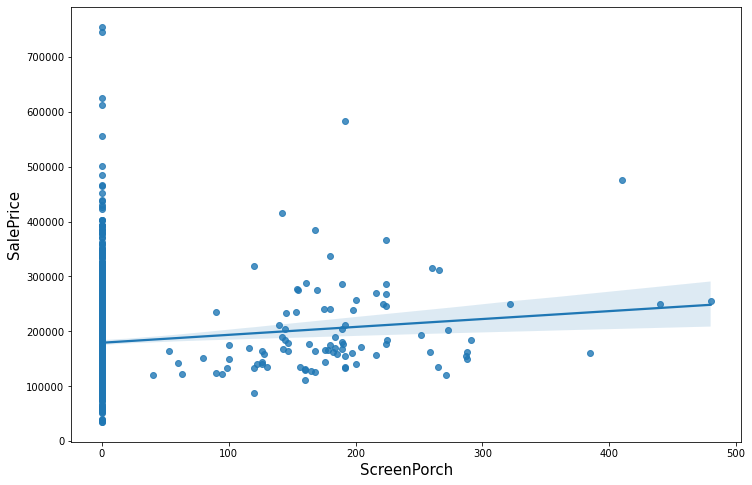

In [125]:
# regplots of the continuous features vs sale price
for column in cont_features:
    plt.figure(figsize=(12,8))
    sns.regplot(x=column,y='SalePrice',data=df)
    plt.xlabel(column,fontsize=15)
    plt.ylabel('SalePrice',fontsize=15)
    plt.show()

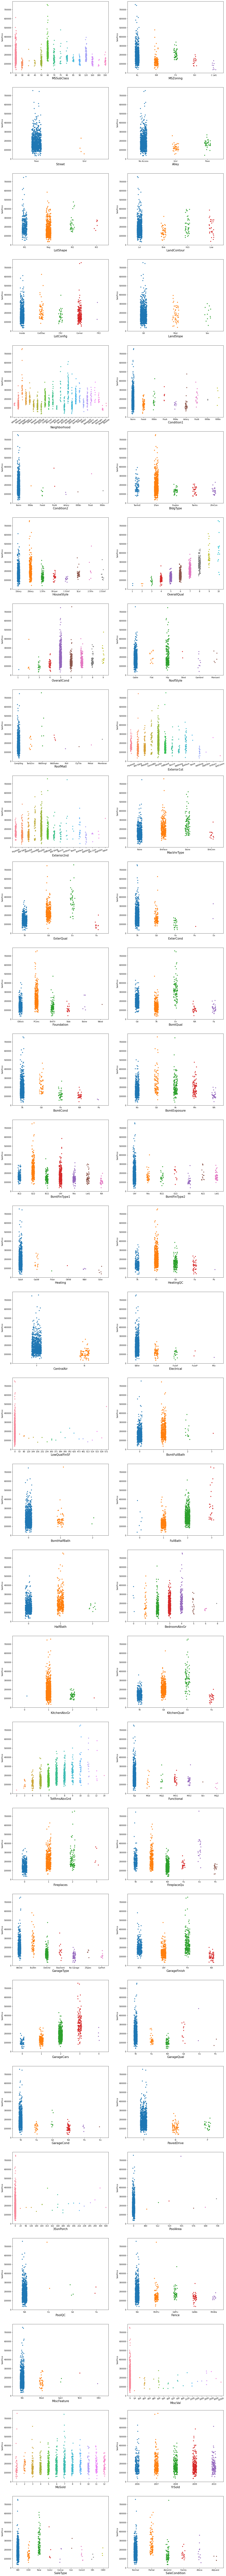

In [126]:
# strip-plots of the categorical features with respect to 'SalePrice'
plt.figure(figsize=(20,250))
plotnumber=1
for column in cat_features:
    if plotnumber<=60:
        ax= plt.subplot(30,2,plotnumber)
        sns.stripplot(x=column,y='SalePrice',data=df)
        plt.xlabel(column,fontsize=15)
        if column in ['Exterior1st','Exterior2nd','MiscVal']:
            plt.xticks(rotation=20)
        elif column=='Neighborhood':
            plt.xticks(rotation=35)
    plotnumber+=1
plt.show()

# Encoding and Imputation

In [127]:
# defining dictionaries to map from for columns which shows the quality ratings(or condition rating) for different parameters.
q_rating1= {'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4}
q_rating2= {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
q_rating3= {'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4}
q_rating4= {'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6}
q_rating5= {'Sal':0,'Sev':1,'Maj2':2,'Maj1':3,'Mod':4,'Min2':5,'Min1':6,'Typ':7}
q_rating6= {'NA':0,'Unf':1,'RFn':2,'Fin':3}
q_rating7= {'N':1,'P':2,'Y':3}
q_rating8= {'NA':0,'MnWw':1,'GdWo':2,'MnPrv':3,'GdPrv':4}

In [128]:
# Encoding using map function and the above defined dictionaries.
df['ExterQual'] = df['ExterQual'].map(q_rating1)
df['ExterCond']= df['ExterCond'].map(q_rating1)
df['BsmtQual']= df['BsmtQual'].map(q_rating2)
df['BsmtCond']= df['BsmtCond'].map(q_rating2)
df['BsmtExposure']= df['BsmtExposure'].map(q_rating3)
df['BsmtFinType1']= df['BsmtFinType1'].map(q_rating4)
df['BsmtFinType2']= df['BsmtFinType2'].map(q_rating4)
df['HeatingQC']= df['HeatingQC'].map(q_rating1)
df['KitchenQual']= df['KitchenQual'].map(q_rating1)
df['Functional']= df['Functional'].map(q_rating5)
df['FireplaceQu']= df['FireplaceQu'].map(q_rating2)
df['GarageFinish']= df['GarageFinish'].map(q_rating6)
df['GarageQual']= df['GarageQual'].map(q_rating2)
df['GarageCond']= df['GarageCond'].map(q_rating2)
df['PavedDrive']= df['PavedDrive'].map(q_rating7)
df['PoolQC']= df['PoolQC'].map(q_rating2)
df['Fence']= df['Fence'].map(q_rating8)

df['CentralAir']= df['CentralAir'].replace({'N':0,'Y':1})

In [129]:
# check for null values.
df.isnull().sum().sum()

# A total of 285 null values in the whole dataset.

285

In [130]:
# Let's check which columns have null values.
for i in df.columns:
    if (df[i].isnull().sum()!=0):
        print(f'{i} has {df[i].isnull().sum()} missing values')

LotFrontage has 214 missing values
MasVnrArea has 7 missing values
GarageYrBlt has 64 missing values


In [131]:
# Imputing the 'MasVnrArea' column with mean. The other columns with missing values with be imputed using KNN imputer after we
# encode all the categorical columns.
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mean())
df['MasVnrArea'].isnull().sum()

0

In [132]:
# Let's get the remaining list of columns with object datatype.
object_cols=[]
for i in df.columns:
    if df[i].dtype=='O':
        object_cols.append(i)
object_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'Electrical',
 'GarageType',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [133]:
# Encoding using LabelEncoder
from sklearn.preprocessing import LabelEncoder
enc= LabelEncoder()

def label_encode(column):
    df[column]= enc.fit_transform(df[[column]])

for i in object_cols:
    label_encode(i)
    
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,3,NaN,4928,1,1,0,3,4,0,...,0,0,0,1,0,2,2007,8,4,128000
1,20,3,95.0,15865,1,1,0,3,4,1,...,0,0,0,1,0,10,2007,8,4,268000
2,60,3,92.0,9920,1,1,0,3,1,0,...,0,0,0,1,0,6,2007,8,4,269790
3,20,3,105.0,11751,1,1,0,3,4,0,...,0,0,3,1,0,1,2010,0,4,190000
4,20,3,NaN,16635,1,1,0,3,2,0,...,0,0,0,1,0,6,2009,8,4,215000


In [134]:
# Using KNN Imputer to fillup the missing values.
from sklearn.impute import KNNImputer
imputer_knn= KNNImputer(n_neighbors=5)
imputed_df= pd.DataFrame(imputer_knn.fit_transform(df),columns=df.columns)
df= imputed_df
df.isnull().sum().sum()

0

# Data Transformation using PowerTransformer

In [135]:
# Get the list of columns having skewness>0.5
skewed_features=[]
for i in cont_features:
    if (np.abs(df[i].skew()))>0.5:
        print(f'{i} : {df[i].skew()}')
        skewed_features.append(i)

LotFrontage : 2.336595822735027
LotArea : 10.659284548299626
MasVnrArea : 2.8346577812934406
BsmtFinSF1 : 1.8716059327957582
BsmtFinSF2 : 4.365829146359866
BsmtUnfSF : 0.9090571206651619
TotalBsmtSF : 1.7445908855423957
1stFlrSF : 1.5137072331415693
2ndFlrSF : 0.8234785103609108
GrLivArea : 1.4499515426476701
WoodDeckSF : 1.504929246192858
OpenPorchSF : 2.41083972347696
EnclosedPorch : 3.0436098308918846
ScreenPorch : 4.105740751686475


In [136]:
# Let's check the correlation of the skewed columns with target variable.
df[skewed_features].corrwith(df['SalePrice'])

# 'BsmtFinSF2' have a very weak relation with 'SalePrice'

LotFrontage      0.349865
LotArea          0.249499
MasVnrArea       0.463626
BsmtFinSF1       0.362874
BsmtFinSF2      -0.010151
BsmtUnfSF        0.215724
TotalBsmtSF      0.595042
1stFlrSF         0.587642
2ndFlrSF         0.330386
GrLivArea        0.707300
WoodDeckSF       0.315444
OpenPorchSF      0.339500
EnclosedPorch   -0.115004
ScreenPorch      0.100284
dtype: float64

In [137]:
# drop the 'BsmtFinSF2' column.
skewed_features.remove('BsmtFinSF2')
df.drop(columns=['BsmtFinSF2'],inplace=True)

In [138]:
# Using power transformer to reduce skewness.
from sklearn.preprocessing import PowerTransformer
pt= PowerTransformer(method="yeo-johnson")

def power_transform(column):
    df[column]= pt.fit_transform(df[[column]])
    
for i in skewed_features:
        power_transform(i)

# Feature Selection

In [139]:
corr_mat= df.corr()
corr_mat

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSSubClass,1.000000,0.007478,-0.439316,-0.425296,-0.035981,0.107699,0.104485,-0.021387,0.076880,-0.014930,...,0.009583,0.016249,-0.108740,-0.049530,-0.023503,-0.016015,-0.038595,0.035050,-0.028981,-0.060775
MSZoning,0.007478,1.000000,-0.088315,-0.067975,0.140215,-0.415953,0.053655,0.001175,-0.027246,-0.023952,...,-0.001663,-0.001604,0.076542,-0.011200,0.003416,-0.051646,-0.004964,0.079854,0.004501,-0.133221
LotFrontage,-0.439316,-0.088315,1.000000,0.717786,-0.065459,-0.093692,-0.192635,-0.063810,-0.220016,0.109617,...,0.155380,0.187996,0.060925,0.028590,0.013435,0.019899,-0.008757,-0.039174,0.063642,0.358889
LotArea,-0.425296,-0.067975,0.717786,1.000000,-0.114844,-0.111897,-0.283041,-0.098283,-0.197101,0.224504,...,0.105877,0.117549,0.014549,0.082122,0.058337,0.025576,-0.039367,-0.016023,0.051767,0.369808
Street,-0.035981,0.140215,-0.065459,-0.114844,1.000000,-0.000978,-0.012941,0.105226,0.000153,-0.141572,...,0.004505,0.004344,0.028404,-0.222166,-0.030354,-0.008860,-0.019635,0.025920,0.014176,0.044753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,-0.016015,-0.051646,0.019899,0.025576,-0.008860,-0.025186,-0.050418,-0.023872,0.019084,0.030526,...,-0.038624,-0.037091,-0.009400,0.020095,-0.008773,1.000000,-0.144536,-0.063667,-0.003462,0.072764
YrSold,-0.038595,-0.004964,-0.008757,-0.039367,-0.019635,0.010096,0.021421,0.009499,-0.009817,-0.005352,...,-0.066063,-0.055584,0.055425,0.042696,-0.008439,-0.144536,1.000000,0.013606,0.024505,-0.045508
SaleType,0.035050,0.079854,-0.039174,-0.016023,0.025920,0.008918,-0.015161,-0.041763,-0.002039,0.056004,...,0.014047,0.010370,-0.000732,-0.011484,0.015900,-0.063667,0.013606,1.000000,0.143557,-0.050851
SaleCondition,-0.028981,0.004501,0.063642,0.051767,0.014176,-0.000467,-0.054905,0.047715,0.043692,-0.061461,...,-0.074354,-0.097382,-0.112466,-0.018463,0.012178,-0.003462,0.024505,0.143557,1.000000,0.217687


In [140]:
# Correlation with target variable.
corr_with_target= np.abs(corr_mat["SalePrice"]).sort_values(ascending= False)
corr_with_target

SalePrice       1.000000
OverallQual     0.789185
GrLivArea       0.694691
ExterQual       0.672665
KitchenQual     0.659228
                  ...   
LandSlope       0.015485
MiscVal         0.013071
BsmtHalfBath    0.011109
MasVnrType      0.007732
BsmtFinType2    0.001534
Name: SalePrice, Length: 78, dtype: float64

In [141]:
# Get the list of columns having correlation <0.04 with 'SalePrice'
drop_list=[]
for i in range(len(corr_with_target)):
    if corr_with_target[i]<0.04:
        drop_list.append(corr_with_target.index[i])
drop_list

['ExterCond',
 'Condition2',
 'LandContour',
 'LowQualFinSF',
 'LandSlope',
 'MiscVal',
 'BsmtHalfBath',
 'MasVnrType',
 'BsmtFinType2']

In [142]:
# drop the columns.
df.drop(columns=drop_list,inplace=True)

# Regression Algorithms and their performance evaluation

In [143]:
# Separating the features and label.
X= df.drop(columns=['SalePrice'])
y= df['SalePrice']

In [144]:
# applying standard scaler on the features and scaling them.
scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)

In [145]:
############################################### LINEAR REGRESSION ##############################################################

from sklearn.linear_model import LinearRegression
lr= LinearRegression()

for i in range(0,5):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=i)
    
    lr.fit(x_train,y_train)

    y_pred_train = lr.predict(x_train)
    accuracy_train = r2_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= lr.predict(x_test)
    accuracy_test = r2_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2))

    print("Mean Absolute Error",round(mean_absolute_error(y_test,y_pred),2))
    print("Root Mean Squared Error",round(np.sqrt(mean_squared_error(y_test,y_pred)),2))
    print("\n")

Training Score for sample 0 : 82.39
Testing Score for sample 0 : 75.89
Mean Absolute Error 22394.33
Root Mean Squared Error 40921.37


Training Score for sample 1 : 82.21
Testing Score for sample 1 : 80.83
Mean Absolute Error 22611.93
Root Mean Squared Error 33262.7


Training Score for sample 2 : 83.67
Testing Score for sample 2 : 69.67
Mean Absolute Error 23557.18
Root Mean Squared Error 44329.17


Training Score for sample 3 : 81.27
Testing Score for sample 3 : 85.64
Mean Absolute Error 21377.88
Root Mean Squared Error 28426.9


Training Score for sample 4 : 84.96
Testing Score for sample 4 : 63.31
Mean Absolute Error 24567.57
Root Mean Squared Error 48875.7




In [146]:
######################################### XTREME-GRADIENT BOOST REGRESSION #####################################################

import xgboost as xgb
xgb_reg= xgb.XGBRegressor()

for i in range(0,5):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=i)
    
    xgb_reg.fit(x_train,y_train)

    y_pred_train = xgb_reg.predict(x_train)
    accuracy_train = r2_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= xgb_reg.predict(x_test)
    accuracy_test = r2_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2))

    print("Mean Absolute Error",round(mean_absolute_error(y_test,y_pred),2))
    print("Root Mean Squared Error",round(np.sqrt(mean_squared_error(y_test,y_pred)),2))
    print("\n")

Training Score for sample 0 : 100.0
Testing Score for sample 0 : 78.53
Mean Absolute Error 19001.51
Root Mean Squared Error 38614.57


Training Score for sample 1 : 100.0
Testing Score for sample 1 : 87.65
Mean Absolute Error 18024.83
Root Mean Squared Error 26694.85


Training Score for sample 2 : 99.99
Testing Score for sample 2 : 85.39
Mean Absolute Error 17099.34
Root Mean Squared Error 30768.52


Training Score for sample 3 : 100.0
Testing Score for sample 3 : 83.61
Mean Absolute Error 18905.24
Root Mean Squared Error 30368.02


Training Score for sample 4 : 99.99
Testing Score for sample 4 : 87.37
Mean Absolute Error 18389.54
Root Mean Squared Error 28674.09




In [147]:
############################################## RANDOM FOREST REGRESSION ########################################################

from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_jobs=-1)

for i in range(0,5):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=i)
   
    rf.fit(x_train,y_train)

    y_pred_train = rf.predict(x_train)
    accuracy_train = r2_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= rf.predict(x_test)
    accuracy_test = r2_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2))

    print("Mean Absolute Error",round(mean_absolute_error(y_test,y_pred),2))
    print("Root Mean Squared Error",round(np.sqrt(mean_squared_error(y_test,y_pred)),2))
    print("\n")

Training Score for sample 0 : 97.91
Testing Score for sample 0 : 88.51
Mean Absolute Error 17229.14
Root Mean Squared Error 28251.12


Training Score for sample 1 : 97.84
Testing Score for sample 1 : 88.95
Mean Absolute Error 17021.26
Root Mean Squared Error 25255.56


Training Score for sample 2 : 97.53
Testing Score for sample 2 : 88.3
Mean Absolute Error 15854.19
Root Mean Squared Error 27539.77


Training Score for sample 3 : 97.75
Testing Score for sample 3 : 88.4
Mean Absolute Error 17251.1
Root Mean Squared Error 25550.25


Training Score for sample 4 : 97.66
Testing Score for sample 4 : 80.06
Mean Absolute Error 19133.45
Root Mean Squared Error 36030.91




In [148]:
############################################## K-NEIGHBORS REGRESSION ##########################################################

from sklearn.neighbors import KNeighborsRegressor
knr= KNeighborsRegressor()

for i in range(0,5):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=i)
   
    knr.fit(x_train,y_train)

    y_pred_train = knr.predict(x_train)
    accuracy_train = r2_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= knr.predict(x_test)
    accuracy_test = r2_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2))

    print("Mean Absolute Error",round(mean_absolute_error(y_test,y_pred),2))
    print("Root Mean Squared Error",round(np.sqrt(mean_squared_error(y_test,y_pred)),2))
    print("\n")

Training Score for sample 0 : 86.11
Testing Score for sample 0 : 67.17
Mean Absolute Error 23400.72
Root Mean Squared Error 47745.1


Training Score for sample 1 : 82.66
Testing Score for sample 1 : 78.81
Mean Absolute Error 21788.9
Root Mean Squared Error 34963.1


Training Score for sample 2 : 85.03
Testing Score for sample 2 : 64.5
Mean Absolute Error 22734.58
Root Mean Squared Error 47962.65


Training Score for sample 3 : 82.4
Testing Score for sample 3 : 78.09
Mean Absolute Error 23068.06
Root Mean Squared Error 35109.72


Training Score for sample 4 : 83.25
Testing Score for sample 4 : 76.06
Mean Absolute Error 24038.25
Root Mean Squared Error 39476.01




# Cross-Validation

In [149]:
# cross-validating the linear regression model.
for i in range(5,11):
    cv_score= cross_val_score(lr,X_scaled,y,cv=i).mean()
    print("the cv score for",i,"fold:", round(cv_score*100,2))

the cv score for 5 fold: 74.4
the cv score for 6 fold: 75.86
the cv score for 7 fold: 74.36
the cv score for 8 fold: 76.22
the cv score for 9 fold: 73.89
the cv score for 10 fold: 75.82


In [150]:
# cross-validating the xgboost regression model.
for i in range(5,11):
    cv_score= cross_val_score(xgb_reg,X_scaled,y,cv=i).mean()
    print("the cv score for",i,"fold:", round(cv_score*100,2))

the cv score for 5 fold: 83.36
the cv score for 6 fold: 83.81
the cv score for 7 fold: 82.14
the cv score for 8 fold: 82.21
the cv score for 9 fold: 83.79
the cv score for 10 fold: 84.21


In [151]:
# cross-validating the random-forests regression model.
for i in range(5,11):
    cv_score= cross_val_score(rf,X_scaled,y,cv=i).mean()
    print("the cv score for",i,"fold:", round(cv_score*100,2))

the cv score for 5 fold: 84.6
the cv score for 6 fold: 85.8
the cv score for 7 fold: 83.5
the cv score for 8 fold: 84.84
the cv score for 9 fold: 84.51
the cv score for 10 fold: 84.74


In [152]:
# cross-validating the knn regression model.
for i in range(5,11):
    cv_score= cross_val_score(knr,X_scaled,y,cv=i).mean()
    print("the cv score for",i,"fold:", round(cv_score*100,2))

the cv score for 5 fold: 75.3
the cv score for 6 fold: 75.11
the cv score for 7 fold: 75.21
the cv score for 8 fold: 75.46
the cv score for 9 fold: 76.24
the cv score for 10 fold: 75.73


# Hyperparameter Tuning

In [153]:
from sklearn.model_selection import GridSearchCV

params= {"n_estimators": [100,250,500],
         "max_depth": [9,11,15,17],
         "min_samples_split":[2,3,4]
         }

grd_rf= GridSearchCV(rf, param_grid=params,cv=5,n_jobs=-1)
grd_rf.fit(x_train,y_train)
print("Best Parameters:",grd_rf.best_params_)

Best Parameters: {'max_depth': 15, 'min_samples_split': 3, 'n_estimators': 100}


In [154]:
# Performance of the tuned model.
rf_tuned= grd_rf.best_estimator_
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=1)

rf_tuned.fit(x_train,y_train)
y_pred_train = rf_tuned.predict(x_train)
accuracy_train = r2_score(y_train,y_pred_train)
y_pred= rf_tuned.predict(x_test)
accuracy_test = r2_score(y_test,y_pred)

print("Training Score for best sample",round(accuracy_train*100,2))
print("Testing Score for best sample:",round(accuracy_test*100,2))
print("Mean Absolute Error",round(mean_absolute_error(y_test,y_pred),2))
print("Root Mean Squared Error",round(np.sqrt(mean_squared_error(y_test,y_pred)),2))

# cross-validating the random forests regression model.
print("\n++++++++++++++ CROSS VALIDATION ++++++++++++++++","\n")
for i in range(5,11):
    cv_score= cross_val_score(rf_tuned,X_scaled,y,cv=i).mean()
    print("the cv score for",i,"fold:", round(cv_score*100,2))

Training Score for best sample 97.52
Testing Score for best sample: 88.66
Mean Absolute Error 17320.62
Root Mean Squared Error 25579.53

++++++++++++++ CROSS VALIDATION ++++++++++++++++ 

the cv score for 5 fold: 85.06
the cv score for 6 fold: 85.16
the cv score for 7 fold: 84.1
the cv score for 8 fold: 85.6
the cv score for 9 fold: 85.49
the cv score for 10 fold: 84.57


Text(0.5, 0, 'Difference between Actual and Predicted SalePrice')

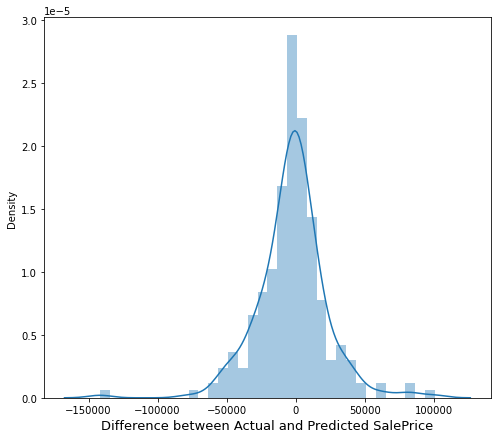

In [155]:
plt.figure(figsize=(8,7))
sns.distplot(y_test-y_pred)
plt.xlabel("Difference between Actual and Predicted SalePrice", fontsize=13)

# Test data prediction

In [172]:
# get the test data and save it in a dataframe.
df_test= pd.read_csv("test_housing.csv")
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [173]:
df_test.shape

(292, 80)

In [174]:
df.isnull().sum().sum()

0

Repeating the preprocessing steps that was done for train dataset.

In [175]:
df_test.drop(columns=['Id'],inplace=True)
df_test['Alley']= df_test['Alley'].fillna("No Access")
df_test.drop(columns=['Utilities'],inplace=True)
df_test['MasVnrType']=df_test['MasVnrType'].fillna("None")
df_test['BsmtQual']=df_test['BsmtQual'].fillna("NA")
df_test['BsmtCond']=df_test['BsmtCond'].fillna("NA")
df_test['BsmtExposure']=df_test['BsmtExposure'].fillna("NA")
df_test['BsmtFinType1']=df_test['BsmtFinType1'].fillna("NA")
df_test['BsmtFinType2']=df_test['BsmtFinType2'].fillna("NA")
df_test['FireplaceQu']=df_test['FireplaceQu'].fillna("NA")
df_test['GarageType']=df_test['GarageType'].fillna("No Garage")
df_test['GarageFinish']=df_test['GarageFinish'].fillna("NA")
df_test['GarageQual']=df_test['GarageQual'].fillna("NA")
df_test['GarageCond']=df_test['GarageCond'].fillna("NA")
df_test['PoolQC']=df_test['PoolQC'].fillna("NA")
df_test['Fence']=df_test['Fence'].fillna("NA")
df_test['MiscFeature']=df_test['MiscFeature'].fillna("NA")


# defining dictionaries to map from for columns which shows the quality ratings(or condition rating) for different parameters.
q_rating1= {'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4}
q_rating2= {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
q_rating3= {'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4}
q_rating4= {'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6}
q_rating5= {'Sal':0,'Sev':1,'Maj2':2,'Maj1':3,'Mod':4,'Min2':5,'Min1':6,'Typ':7}
q_rating6= {'NA':0,'Unf':1,'RFn':2,'Fin':3}
q_rating7= {'N':1,'P':2,'Y':3}
q_rating8= {'NA':0,'MnWw':1,'GdWo':2,'MnPrv':3,'GdPrv':4}

# Encoding using map function and the above defined dictionaries.
df_test['ExterQual'] = df_test['ExterQual'].map(q_rating1)
df_test['ExterCond']= df_test['ExterCond'].map(q_rating1)
df_test['BsmtQual']= df_test['BsmtQual'].map(q_rating2)
df_test['BsmtCond']= df_test['BsmtCond'].map(q_rating2)
df_test['BsmtExposure']= df_test['BsmtExposure'].map(q_rating3)
df_test['BsmtFinType1']= df_test['BsmtFinType1'].map(q_rating4)
df_test['BsmtFinType2']= df_test['BsmtFinType2'].map(q_rating4)
df_test['HeatingQC']= df_test['HeatingQC'].map(q_rating1)
df_test['KitchenQual']= df_test['KitchenQual'].map(q_rating1)
df_test['Functional']= df_test['Functional'].map(q_rating5)
df_test['FireplaceQu']= df_test['FireplaceQu'].map(q_rating2)
df_test['GarageFinish']= df_test['GarageFinish'].map(q_rating6)
df_test['GarageQual']= df_test['GarageQual'].map(q_rating2)
df_test['GarageCond']= df_test['GarageCond'].map(q_rating2)
df_test['PavedDrive']= df_test['PavedDrive'].map(q_rating7)
df_test['PoolQC']= df_test['PoolQC'].map(q_rating2)
df_test['Fence']= df_test['Fence'].map(q_rating8)

df_test['CentralAir']= df_test['CentralAir'].replace({'N':0,'Y':1})


def label_encode(column):
    df_test[column]= enc.fit_transform(df_test[[column]])

for i in object_cols:
    label_encode(i)
    
imputer_knn= KNNImputer(n_neighbors=5)
imputed_df= pd.DataFrame(imputer_knn.fit_transform(df_test),columns=df_test.columns)
df_test= imputed_df
    
df_test.drop(columns=['BsmtFinSF2'],inplace=True)
for i in skewed_features:
        power_transform(i)
        
df_test.drop(columns=drop_list,inplace=True)

df_test_scaled= scaler.fit_transform(df_test)

In [176]:
# Prediction using our model.
predictions= rf_tuned.predict(df_test_scaled)
len(predictions)

292

In [177]:
predictions_df= pd.DataFrame({'Price':predictions})
predictions_df

,Price
0,336220.712881
1,265333.421905
2,248795.695000
3,161961.113636
4,213498.650595
...,...
287,267366.457333
288,137520.829702
289,143565.735714
290,153680.627500


In [178]:
predictions_df.to_excel("Predictions_Housing.xlsx")

# Saving the model using pickle

In [179]:
# saving the tuned random-forests model using pickle.
import pickle 

Housing_Price= "Housing_Price_model.pickle"
pickle.dump(rf_tuned, open(Housing_Price,'wb'))